# Constraints

[Try this yourself](https://colab.research.google.com/github/DTUWindEnergy/TopFarm2/blob/master/docs/notebooks/constraints.ipynb) (requires google account)


In [0]:
%%capture
# Install Topfarm if needed
try:
    import topfarm
except ModuleNotFoundError:
    !pip install topfarm


In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

**Import and initialize**

In [2]:
from topfarm import TopFarmProblem
from topfarm.plotting import XYPlotComp
from topfarm.constraint_components.boundary import XYBoundaryConstraint, CircleBoundaryConstraint
from topfarm.constraint_components.spacing import SpacingConstraint

from topfarm.cost_models.cost_model_wrappers import CostModelComponent
boundary = np.array([(0, 0), (1, 1), (3, 0), (3, 2), (0, 2)])

x = [0.5,1.5]
y = [.5,1.5]
dummy_cost = CostModelComponent(input_keys=[],
                                n_wt=2,
                               cost_function=lambda : 1)   

## Boundary constraints

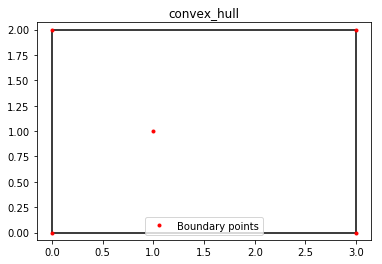

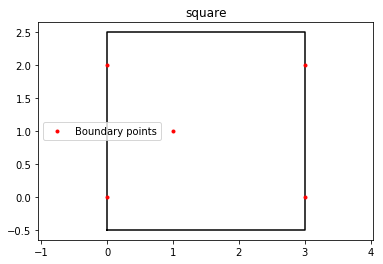

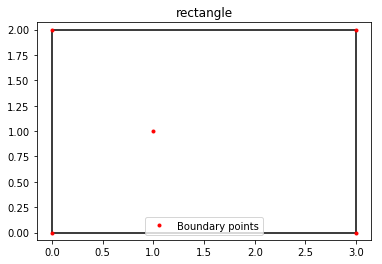

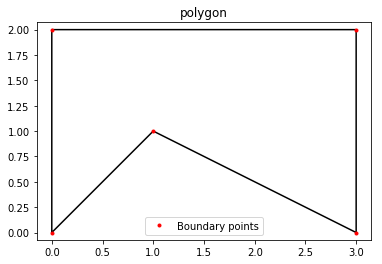

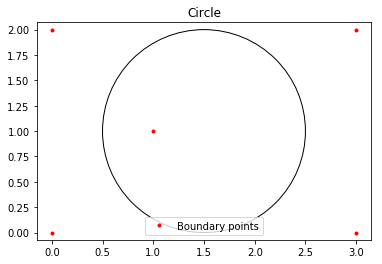

In [4]:
def plot_boundary(name, constraint_comp):
    tf = TopFarmProblem(
        design_vars={'x':x, 'y':y},
        cost_comp=dummy_cost,
        constraints=[constraint_comp],
        plot_comp=XYPlotComp())
    
    plt.figure()
    plt.title(name)
    tf.plot_comp.plot_constraints()
    plt.plot(boundary[:,0], boundary[:,1],'.r', label='Boundary points')
    plt.axis('equal')
    plt.legend()
    
for boundary_type in ['convex_hull','square','rectangle','polygon']:
    plot_boundary(boundary_type, XYBoundaryConstraint(boundary, boundary_type))

plot_boundary('Circle',CircleBoundaryConstraint((1.5,1),1))

                          

## Spacing constraint

In [ ]:
def plot_spacing(name, constraint_comp):
    tf = TopFarmProblem(
        design_vars={'x':x, 'y':y},
        cost_comp=dummy_cost,
        constraints=[constraint_comp],
        plot_comp=XYPlotComp())
    
    plt.figure()
    plt.title(name)
    tf.plot_comp.plot_constraints()
    plt.plot(x,y,'.b', label='Wind turbines')
    plt.axis('equal')
    plt.legend()
    plt.ylim([0,2])
                          
plot_spacing('spacing', SpacingConstraint(1))